# Extraction de connaissances à partir de données structurées et non structurées

## Séance 4 : Classification

### Utilisation de `python`

## Librairies utilisées

Toujours dans le module `sklearn`, et particulièrement le sous-module `cluster`

- Fonction `AgglomerativeClustering` : réalisation de la CAH
- Fonction `KMeans` : réalisation de $k$-means

In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style("white")

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

## Données utilisées

Données sur des iris [disponibles ici](https://fxjollois.github.io/donnees/Iris.txt)

In [2]:
iris = pandas.read_table("https://fxjollois.github.io/donnees/Iris.txt", sep = "\t")
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Suppression de la variable Species

Comme l'ACP, la classification avec la CAH et $k$-means ne se fait uniquement que sur des variables quantitatives

In [3]:
iris2 = iris.drop("Species", axis = 1)
iris2.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Classification Ascendante Hiérarchique (CAH)

### Réalisation

Indiquer `distance_threshold = 0` et `n_clusters = None` va nous permettre de récupérer l'arbre complet (le dendrogramme).

In [4]:
hac = AgglomerativeClustering(distance_threshold = 0, n_clusters = None)
hac.fit(scale(iris2))

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

### Réalisation du dendrogramme

Création d'une fonction en se basant sur [cette page](https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py) (avec quelques modifications)

In [5]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = numpy.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = numpy.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

### Dendrogramme

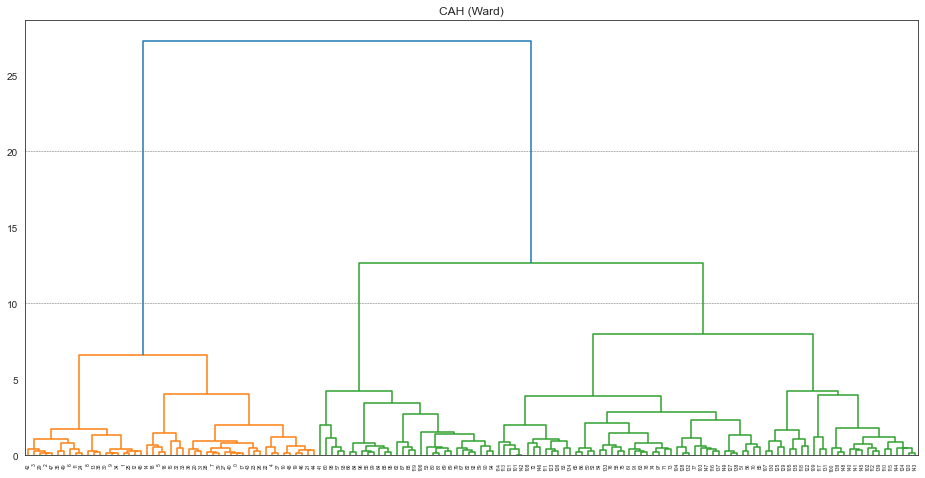

In [6]:
plt.figure(figsize = (16, 8))
plt.title("CAH (Ward)")
plot_dendrogram(hac)
plt.axhline(y = 20, linewidth = .5, color = "dimgray", linestyle = "--")
plt.axhline(y = 10, linewidth = .5, color = "dimgray", linestyle = "--")
plt.show()

### Avec proposition du nombre de classes

La méthode propose une partition en un nombre de classes choisi via un algorithme interne.

In [7]:
hac2 = AgglomerativeClustering()
hac2.fit(scale(iris2))

AgglomerativeClustering()

In [8]:
hac2.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Avec recherche du nombre de classes demandé

Mais on peut bien évidemment choisir notre propre nombre de classes.

In [9]:
hac3 = AgglomerativeClustering(n_clusters = 3)
hac3.fit(scale(iris2))

AgglomerativeClustering(n_clusters=3)

In [10]:
hac3.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Caractérisation des classes

Très généralement, pour comprendre les classes et les commenter, nous calculons les centres de celles-ci (valeurs moyennes pour chaque variable)

In [11]:
iris2.assign(classe = hac3.labels_).groupby("classe").mean()

,Sepal Length,Sepal Width,Petal Length,Petal Width
classe,,,,
0,6.546479,2.992958,5.267606,1.854930
1,5.016327,3.451020,1.465306,0.244898
2,5.530000,2.566667,3.930000,1.206667


## $k$-means

### Réalisation

Ici, nous devons, bien évidemment, indiquer le nombre de classes que l'on souhaite.

In [12]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(scale(iris2))

KMeans(n_clusters=3)

### Informations sur la partition

In [13]:
pandas.Series(kmeans.labels_).value_counts()

2    56
1    50
0    44
dtype: int64

### Centre des classes

On obtient les centres des classes automatiquement. Ayant utilisé les données centrées-réduites, leur analyse est simple par un lecteur avisé (valeur positive $\rightarrow$ supérieure à la moyenne, et inversement).

In [14]:
kmeans.cluster_centers_

array([[ 1.16743407,  0.14530299,  1.00302557,  1.0300019 ],
       [-1.01457897,  0.85326268, -1.30498732, -1.25489349],
       [-0.01139555, -0.87600831,  0.37707573,  0.31115341]])

Mais pour présenter les classes, on va préférer recalculer ces centres sur les données originelles.

In [15]:
iris2.assign(classe = kmeans.labels_).groupby("classe").mean()

,Sepal Length,Sepal Width,Petal Length,Petal Width
classe,,,,
0,6.806818,3.120455,5.522727,1.981818
1,5.006000,3.428000,1.462000,0.246000
2,5.833929,2.676786,4.421429,1.435714


### Choix du nombre de classes


In [16]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = "random", n_init = 20).fit(scale(iris2))
    inertia = inertia + [kmeans.inertia_]
rsquare = [(inertia[0] - i) / inertia[0] for i in inertia]
criteres = pandas.DataFrame({
    "k": range(1, 11), 
    "inertia": inertia,
    "rsquare": rsquare,
    "pseudof": [(rsquare[k-1] / k) / ((1 - rsquare[k-1]) / (150 - k)) if k > 1 else None for k in range(1, 11)]
})
print(criteres)

    k     inertia   rsquare     pseudof
0   1  600.000000  0.000000         NaN
1   2  222.361705  0.629397  125.674670
2   3  139.820496  0.766966  161.269601
3   4  114.092547  0.809846  155.449436
4   5   90.927514  0.848454  162.361220
5   6   80.022188  0.866630  155.950092
6   7   70.763767  0.882060  152.783558
7   8   62.544051  0.895760  152.529984
8   9   55.722393  0.907129  153.026735
9  10   47.216389  0.921306  163.904329


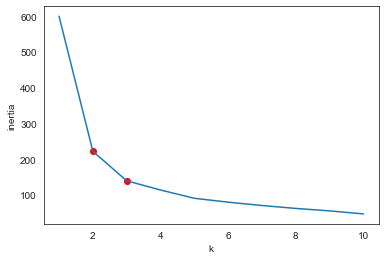

In [17]:
seaborn.lineplot(data = criteres, x = "k", y = "inertia")
plt.scatter(2, criteres.query('k == 2')["inertia"], c = "red")
plt.scatter(3, criteres.query('k == 3')["inertia"], c = "red")
plt.show()

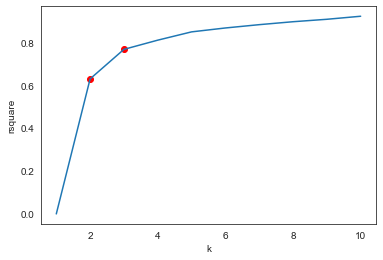

In [18]:
seaborn.lineplot(data = criteres, x = "k", y = "rsquare")
plt.scatter(2, criteres.query('k == 2')["rsquare"], c = "red")
plt.scatter(3, criteres.query('k == 3')["rsquare"], c = "red")
plt.show()

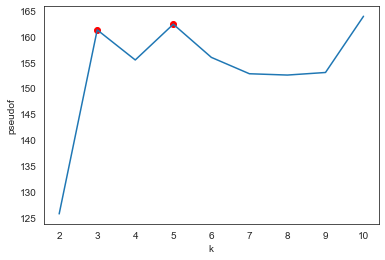

In [19]:
seaborn.lineplot(data = criteres, x = "k", y = "pseudof")
plt.scatter(3, criteres.query('k == 3')["pseudof"], c = "red")
plt.scatter(5, criteres.query('k == 5')["pseudof"], c = "red")
plt.show()

## Exercice - Wine

Nous reprenons les données sur le vin disponible sur [cette page](https://archive.ics.uci.edu/ml/datasets/wine) du site l'UCI MLR. Voici le code pour récupérer les données

In [24]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
wine = pandas.read_csv(url, header = None, sep = ",")
wine.columns = ["class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", 
                "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", 
                "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]
wine

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


### Travail à faire

- Chercher un nombre de classes intéressant, à l'aide de la CAH
    - Récupérer la partition ainsi obtenue
    - Caractériser celles-ci avec les centres des classes
- Faire de même avec $k$-means, en utilisant les critères $R^2$ et $PseudoF$
    - Récupérer la partition ainsi obtenue
    - Caractériser celles-ci avec les centres des classes
- Comparer les 2 partitions ainsi obtenues
- Représenter celles-ci, chacun séparément, sur le plan factoriel de l'ACP